<a href="https://colab.research.google.com/github/Nareshraj22/bigmart/blob/main/Fake_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description**: True and Fake News Prediction Using Machine Learning.
       

   1.  **Project Title**: True and Fake News Prediction.
   2.   **Objective**:To create a machine learning model that can reliably identify news items as phony or true (actual). The purpose of this project is to increase the capacity to recognize false information and the dependability of information sources.

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import numpy as np
import pandas as pd
##importing the required libraries for the Analysis of the project.

In [100]:
train=pd.read_csv('/content/drive/MyDrive/Collab notebooks2/train.csv')
## import necessary libraries and load dataset.

In [101]:
test=pd.read_csv('/content/drive/MyDrive/Collab notebooks2/test.csv')
## import necessary libraries and load dataset.

# Data Structures And Content

In [102]:
train.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(20800, 5)

In [103]:
test.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(5200, 4)

In [104]:
train.info()
# display coloumn names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [105]:
test.info()
# display coloumn names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [106]:
train.isnull().sum()
#display number of missing values of each column

,0
id,0
title,558
author,1957
text,39
label,0


In [107]:
test.isnull().sum()
#display number of missing values of each column


,0
id,0
title,122
author,503
text,7


In [108]:
train.describe()
#display discriptive statistics

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [109]:
test.describe()
#display discriptive statistics

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [110]:
train.head()
#display first few rows of the datasets

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [111]:
test.head()
#display first few rows of the datasets

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Data Preprocessing

**1.Removing null values**

In [112]:
train=train.fillna('')
#Filling Missing Values: The fillna('') method replaces all NaN (Not a Number) or missing values in the DataFrame with an empty string ''.

In [113]:
test=train.fillna('')
##Filling Missing Values: The fillna('') method replaces all NaN (Not a Number) or missing values in the DataFrame with an empty string ''.

In [114]:
test.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [115]:
train['subject']=train['author'] + '' + train['title']
#create a new column in the train DataFrame called subject

In [116]:
train.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [117]:
test['subject']=test['author'] + '' + test['title']
#create a new column in the train DataFrame called subject

In [118]:
test.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


**2.Tokenization:**

1.   Standardization: Transforms text into a standard format that machine learning algorithms can understand..
2.   Feature Extraction:Makes it easier to extract useful characteristics from text data.
3.   Model Input:Gets text data ready for transformation into numerical representations compatible with machine learning algorithms..

In [119]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
from nltk.tokenize import word_tokenize
train['tokens']=train['subject'].apply(word_tokenize)
#splits a given sentence into words using the NLTK library.

In [121]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [122]:
from nltk.tokenize import word_tokenize
test['tokens']=test['subject'].apply(word_tokenize)
#splits a given sentence into words using the NLTK library.

In [123]:
test.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


**3.Lower casting for test:**

In text analysis and natural language processing (NLP), lowercasing text is a typical preprocessing step. The process entails changing every character in a text collection to lowercase. Standardizing text data requires this process, particularly when working on projects involving text categorization, sentiment analysis, or other NLP-related tasks.

In [124]:
train['subject']=train['subject'].str.lower
# Assuming 'text_column' is the column in your DataFrame that contains the text data

In [125]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,<bound method StringMethods.lower of <pandas.c...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,<bound method StringMethods.lower of <pandas.c...,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,<bound method StringMethods.lower of <pandas.c...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,<bound method StringMethods.lower of <pandas.c...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,<bound method StringMethods.lower of <pandas.c...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [126]:
test['subject']=test['subject'].str.lower
# Assuming 'text_column' is the column in your DataFrame that contains the text data

In [127]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,<bound method StringMethods.lower of <pandas.c...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,<bound method StringMethods.lower of <pandas.c...,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,<bound method StringMethods.lower of <pandas.c...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,<bound method StringMethods.lower of <pandas.c...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,<bound method StringMethods.lower of <pandas.c...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


**4.Removal of punctatio:**

Another typical preprocessing step in text analysis and natural language processing (NLP) is the removal of punctuation. It entails removing punctuation from text data in order to make the text simpler and concentrate on the content itself, which might enhance the functionality of different text-based algorithms.

In [128]:
train['subject']=train['subject'].str.replace('[^\w\s]','')
# used to remove punctuation from the subject column in the train DataFrame.

In [129]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,NaN,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [130]:
test['subject']=test['subject'].str.replace('[^\w\s]','')
#used to remove punctuation from the subject column in the train DataFrame.

In [131]:
test.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,NaN,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,"[Howard, PortnoyIranian, woman, jailed, for, f..."


**5.Removal of stopwords:**

Another crucial preprocessing step in text analysis and natural language processing (NLP) is the removal of stopwords. In order to decrease the dimensionality of the data and concentrate on the more significant terms, stopwords—common words like "and," "the," "is," "in," etc can be eliminated.

In [132]:
from nltk.corpus import stopwords

In [133]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [134]:
SW = set(stopwords.words('english'))
print(SW)
# Showcasing the stopwords in English

{'didn', 'is', 'each', 'this', 'mightn', 'herself', 'in', 'and', 'not', 'only', "don't", "haven't", "needn't", 'now', 'wasn', 'just', 'too', 'doesn', 'between', 'nor', 'few', 'he', 'll', 'our', "wasn't", 'm', "it's", 'under', 'such', 'more', 'about', 'myself', 'own', 'she', 'for', 'until', 'up', 'shan', 'have', 'again', 'no', 'very', 'hers', 'from', 'ours', 'because', 'should', "shouldn't", 'hadn', 'couldn', 'will', 'here', 'any', "won't", 'by', 'o', 'you', 'then', 'on', 'why', 'me', "you've", "isn't", 'haven', "aren't", 'before', 'ma', 'to', 'was', 'of', 'him', 'into', 'further', "weren't", 'below', 'your', 'all', "didn't", 'who', 'these', 'yours', "shan't", 'needn', 'at', 'where', 'can', 'so', 'it', 'am', 'which', 'yourselves', 'when', 'd', "wouldn't", 'wouldn', 'them', 'with', 'are', 'isn', 'mustn', "mustn't", 'during', 'or', 'y', 'after', 'being', 'both', 'other', 'we', 'down', 'shouldn', 'out', 'most', 'itself', "couldn't", 'has', 'its', 'does', 'weren', 'doing', 'their', 'what', 

In [135]:
train['subject'] = train['subject'].apply(lambda x: ' '.join(['word for word in x.split() if word not in sw']))
# Here we try to remove the stopwords by adding only the words which are not in the sw stopword set.


In [136]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,word for word in x.split() if word not in sw,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,word for word in x.split() if word not in sw,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,word for word in x.split() if word not in sw,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,word for word in x.split() if word not in sw,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,word for word in x.split() if word not in sw,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [137]:
test['subject'] = test['subject'].apply(lambda x: ' '.join(['word for word in x.split() if word not in sw']))
# Here we try to remove the stopwords by adding only the words which are not in the sw stopword set.

In [138]:
test.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,word for word in x.split() if word not in sw,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,word for word in x.split() if word not in sw,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,word for word in x.split() if word not in sw,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,word for word in x.split() if word not in sw,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,word for word in x.split() if word not in sw,"[Howard, PortnoyIranian, woman, jailed, for, f..."


**6.Open a text box & type as Stemming or lammatization:**

**Definition:** Lemmatization is the act of distilling a word to its dictionary or root form, or "lemma." Lemmatization, in contrast to stemming, takes the word's context into account and returns the correct base form based on morphological analysis and vocabulary.

 **Purpose:**To examine several inflected forms of a word as a single item, the purpose is to group them together. For instance, "better" would become "good," while "running" would become "run."

**Algorithms:** Lemmatization requires a dictionary or a corpus to find the correct base form of a word

In [139]:
from nltk.stem import PorterStemmer

In [140]:
# To apply Stemming or Lemmatization :
stemmer = PorterStemmer()
train['subject'] = train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [141]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,word for word in x.split() if word not in sw,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,word for word in x.split() if word not in sw,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,word for word in x.split() if word not in sw,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,word for word in x.split() if word not in sw,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,word for word in x.split() if word not in sw,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [142]:
# To apply Stemming or Lemmatization :
stemmer = PorterStemmer()
test['subject'] = test['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [143]:
test.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,word for word in x.split() if word not in sw,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,word for word in x.split() if word not in sw,"[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,word for word in x.split() if word not in sw,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,word for word in x.split() if word not in sw,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,word for word in x.split() if word not in sw,"[Howard, PortnoyIranian, woman, jailed, for, f..."


**7.Vectoritation:**

The technique of vectorization involves taking text or categorical data and turning it into a numerical format that can be fed into machine learning models. It is an essential stage in the preprocessing pipeline since machine learning algorithms need numerical input to execute computations, which makes it especially important for text data.

In [144]:
x=train['subject']
y=train['label']

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the TfidfVectorizer class for vectorizing text data

In [146]:
Vt=TfidfVectorizer()
Vt.fit(x)

TfidfVectorizer()

In [147]:
x.head()

,subject
0,word for word in x.split() if word not in sw
1,word for word in x.split() if word not in sw
2,word for word in x.split() if word not in sw
3,word for word in x.split() if word not in sw
4,word for word in x.split() if word not in sw


In [148]:
x=Vt.transform(x)

In [149]:
print(x)

  (0, 6)	0.7071067811865476
  (0, 5)	0.23570226039551587
  (0, 4)	0.23570226039551587
  (0, 3)	0.23570226039551587
  (0, 2)	0.47140452079103173
  (0, 1)	0.23570226039551587
  (0, 0)	0.23570226039551587
  (1, 6)	0.7071067811865476
  (1, 5)	0.23570226039551587
  (1, 4)	0.23570226039551587
  (1, 3)	0.23570226039551587
  (1, 2)	0.47140452079103173
  (1, 1)	0.23570226039551587
  (1, 0)	0.23570226039551587
  (2, 6)	0.7071067811865476
  (2, 5)	0.23570226039551587
  (2, 4)	0.23570226039551587
  (2, 3)	0.23570226039551587
  (2, 2)	0.47140452079103173
  (2, 1)	0.23570226039551587
  (2, 0)	0.23570226039551587
  (3, 6)	0.7071067811865476
  (3, 5)	0.23570226039551587
  (3, 4)	0.23570226039551587
  (3, 3)	0.23570226039551587
  :	:
  (20796, 3)	0.23570226039551587
  (20796, 2)	0.47140452079103173
  (20796, 1)	0.23570226039551587
  (20796, 0)	0.23570226039551587
  (20797, 6)	0.7071067811865476
  (20797, 5)	0.23570226039551587
  (20797, 4)	0.23570226039551587
  (20797, 3)	0.23570226039551587
  (20797, 

In [150]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [151]:
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [152]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [153]:
Modal=LogisticRegression()

In [154]:
Modal.fit(xtrain,ytrain)

LogisticRegression()

In [155]:
ytrpredict=Modal.predict(xtrain)

In [156]:
accuracy =accuracy_score(ytrain,ytrpredict)
precision = precision_score(ytrain, ytrpredict)
recall = recall_score(ytrain, ytrpredict)
f1 = f1_score(ytrain, ytrpredict)

In [157]:
print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:', f1)

 Training Accuracy: 0.5006009615384616
 Training Precision: 0.5006009615384616
 Training Recall: 1.0
Training F1 Score: 0.6672006407689227


In [158]:
Yttpredict=Modal.predict(xtest)

In [159]:
accuracy  =accuracy_score(ytest,Yttpredict)
precision = precision_score(ytest, Yttpredict)
recall = recall_score(ytest, Yttpredict)
f1 = f1_score(ytest, Yttpredict)

In [160]:
print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:', f1)

 Testing Accuracy: 0.5007211538461539
 Testing Precision: 0.5007211538461539
 Testing Recall: 1.0
Testing F1 Score: 0.6673073842703828


In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

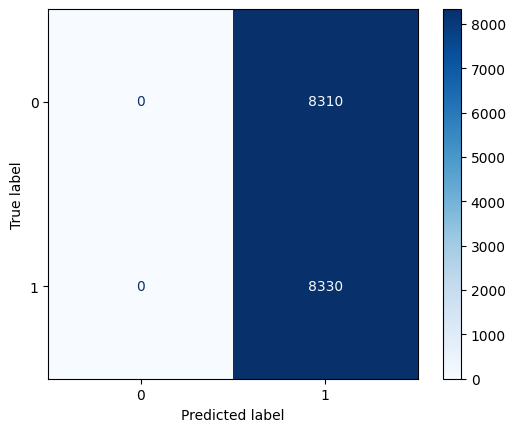

In [162]:
# Generate the confusion matrix
cm = confusion_matrix(ytrain,ytrpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

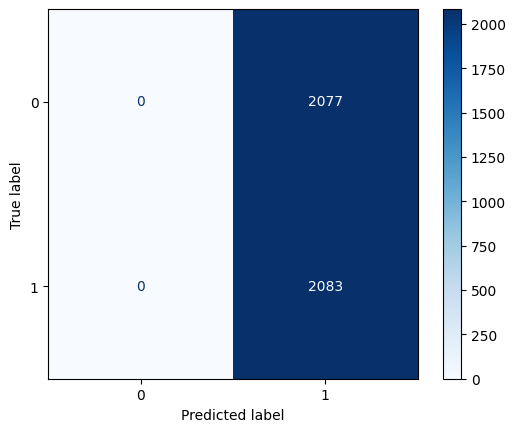

In [163]:
# Generate the confusion matrix
cm = confusion_matrix(ytest,Yttpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

**Project Summary**: True and Fake News Prediction Using Machine Learning

**Objective**: Building a machine learning model that can precisely predict whether a particular news story is true (real) or fraudulent is the aim of this research. In the current digital era, where false information may travel quickly and have a big impact on society, this is vital.

**Data Collection: Datasets**:Typically, tagged datasets with examples of real and false news articles are used in the research. The Kaggle Fake News Challenge dataset and the Fake News Detection dataset are popular datasets for this job. Features: The article's text (title, body), metadata (author, publication date), and maybe social media metrics (likes, shares) are common features.

**Data Preprocessing**:

**Text Cleaning**: Remove HTML tags, special characters, and punctuation. Convert all text to lowercase to ensure uniformity.

**Stopwords Removal**: Eliminate common words that do not contribute to the classification task (e.g., "and," "the," "is").

**Tokenization**: Split the text into individual words or tokens.

**Stemming/Lemmatization**: Reduce words to their base or root form to consolidate similar words (e.g., "running" → "run").

**Vectorization**:Transform the cleaned and tokenized text into numerical features by applying methods such as Word Embeddings, Bag of Words, and TF-IDF. (e.g.,  GloVe,Word2Vec).